# Simple Linear Regression

Normally the SLR is defined as when a model predicts numerical target values based on a single dependent variable, then it becomes a simple linear regression model.

### Aim

* Build a Regression model manually by applying statistical equations
* Building a model using a scikit learn package

#### Steps involving in this model:

* Read data
* EDA
* Create a train set and a test set
* Use train set to build the model
* Test the model
* Visualize

#### Step - 1 : Importing the required Libraries from python

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Step - 2 : Reading the dataset

In [10]:
df = pd.read_csv("boston_housing.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### Step - 3: EDA Process:

Checking the Null values

In [17]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Getting information about the dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [21]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [23]:
df.shape

(506, 14)

### Consider the column, ‘RM’, as predictor, and ‘MEDV’ as the target variable

In [27]:
# Calculating the mean.
mean_value = df['MEDV'].mean()

Text(0, 0.5, 'MEDV')

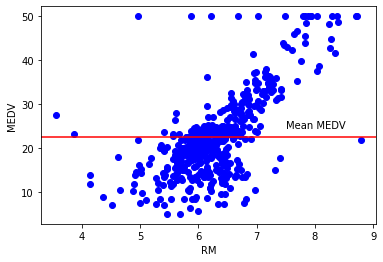

In [29]:
# Plotting the actual time taken for various values of number of faulty units.
plt.scatter(df['RM'],df['MEDV'],color='blue', marker='o')

# Plotting the mean
plt.axhline(y=mean_value,c="r")

# Adding annotation, xlabel and ylabel.
plt.annotate("Mean MEDV",xy = (7.5,mean_value+2))
plt.xlabel("RM")
plt.ylabel("MEDV")

So we can understand that, we can't do anything with mean value.

#### Building model manually

Since we have only one predictor, we are going to build a simple linear model.
So, our model will contain a single independant variable.

Hence the model is going to be a simple straight line, with equation y=mx+c.  where,
* x is independant variable (RM),
* y is the dependant variable (MEDV),
* m is the slope of the straight line and
* c is the intercept.

To built the best fit model, we need to find the appropriate coefficient and intercept values, such that the sum of the squared regression error becomes zero. We use differential calculus to find the same.

Using differntial calculus, we would arrive at
   * m= (sum(x*y) - n*mean(x)*mean(y)) / (sum(x**2) - n*(mean(x)**2))
    * c= mean(y) - (m * mean(x))
        * where x is the predictor values
            y is the actual target values
            n is the sample size

</pre>

In [31]:
#calculating everyting manually
x = df['RM']
y = df['MEDV']
xy = x*y
n = len(df)
xmean = df.RM.mean()
ymean = df.MEDV.mean()
numerator = xy.sum() - n*xmean*ymean
denominator = (x**2).sum() - n*(xmean**2)
m = numerator/denominator
c = ymean - (m*xmean)
print('intercept : ',c,' coefficient : ',m)

intercept :  -34.670620776445816  coefficient :  9.102108981181456


In [33]:
#creating a column named best_fit_model
best_fit_model = m*df.RM + c
df['best_fit_model'] = best_fit_model

In [34]:
#creating dataframe with needed values

df1 = df[["RM","MEDV","best_fit_model"]]
df1.head()

,RM,MEDV,best_fit_model
0,6.575,24.0,25.175746
1,6.421,21.6,23.774021
2,7.185,34.7,30.728032
3,6.998,33.4,29.025938
4,7.147,36.2,30.382152


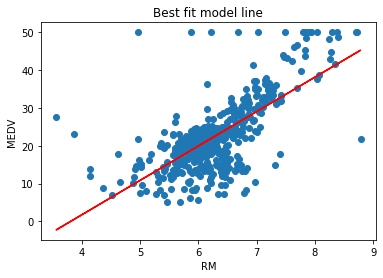

In [38]:
#visualizing the data and our predicted values
plt.scatter(data=df1,x="RM",y="MEDV")
plt.plot(df1.RM,df1.best_fit_model,color="red")
plt.ylabel("MEDV")
plt.xlabel("RM")
plt.title("Best fit model line")
plt.show()

#### Error

It is important to calcualte the error in the best fit model.

In [40]:
# Computing the Sum of Squared Errors for the best fit model

best_fit_model_obs = pd.DataFrame({"RM":df1.RM,
              "MEDV":df1.MEDV,
              "Predicted value":df1.best_fit_model,
              "Error":df.best_fit_model - df.MEDV})

# SSE for the best fit model
sum(best_fit_model_obs.Error**2)

22061.879196211787

#### Building Regression model using Scikit-Learn Library

In [46]:
# Importing the required library
from sklearn.linear_model import LinearRegression

#INDEPENDENT VARIABLE
x = df[['RM']]

#DEPENDENT OR TARGET VARIABLE
y=df['MEDV']

# Creating a linear regression model
model = LinearRegression()

# Fitting the model to the data i.e. building the model
model.fit(x, y)

# Fetching intercept (b0) and coefficient (b1)
print("Intercept:", model.intercept_)
print("Coefficients:",model.coef_)

Intercept: -34.67062077643857
Coefficients: [9.10210898]


#### Coefficient of Determination $R^2$

In [50]:
SST = sum((df1.MEDV.mean() - df.MEDV)**2)

SSE = sum(best_fit_model_obs.Error**2)

SSR = SST - SSE

Rsq = SSR/SST

Rsq1 = model.score(df1[["RM"]],y)

print("The coef in manual model: ",Rsq)
print("The coef in scikit learn model: ",Rsq1)

The coef in manual model:  0.48352545599133473
The coef in scikit learn model:  0.48352545599133423


### Report

So our manual calcualtion and our scikit pakages are saying, our coefficient value is nearly 0.483.
Normally if the $R^2$ value is 1, then our model is accurate and 0 means not accurate. 
Ours is 0.483, so our model is not accurate.

### Preparing the next model preparation

So now we are going to split the data ( 80 percent data will be trained and 20 percent to test).

#### Creating train and test dataset

Let's split our dataset into train and test sets.
Around 80% of the entire dataset will be used for training and 20% for testing. 
We create a mask to select random rows using the np.random.rand() function:

In [53]:
mask = np.random.rand(len(df)) < 0.8
train = df1[mask]
test = df1[~mask]

#### Train data distribution

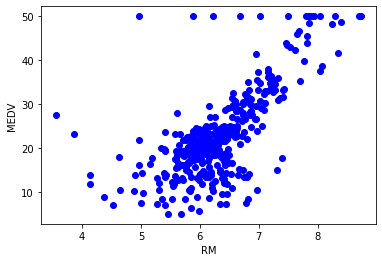

In [54]:
plt.scatter(train.RM, train.MEDV,  color='blue')
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.show()

#### Test data distribution

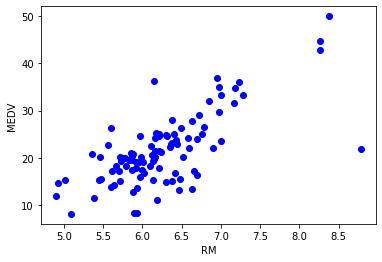

In [55]:
plt.scatter(test.RM, test.MEDV,  color='blue')
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.show()

In [66]:

x = train[['RM']]
y = train[['MEDV']]
model.fit (x, y)
# The coefficients
print ('Coefficient: ', model.coef_)

Coefficient:  [[9.3339486]]


### Prediction

In [71]:
y_hat = model.predict(test[['RM']])
x = test[['RM']]
y = test[['MEDV']]
print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(x, y))

Residual sum of squares: 29.19
Variance score: 0.49


### Preparing the next model preparation

So now we are going to split the data ( 67 percent data will be trained and 33 percent to test).

Creating train and test dataset
Let's split our dataset into train and test sets. Around 67% of the entire dataset will be used for training and 33% for testing. We create a mask to select random rows using the np.random.rand() function:

In [74]:
mask1 = np.random.rand(len(df)) < 0.67
train = df1[mask]
test = df1[~mask]


x = train[['RM']]
y = train[['MEDV']]
model.fit (x, y)

y_hat = model.predict(test[['RM']])
x = test[['RM']]
y = test[['MEDV']]
print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(x, y))

Residual sum of squares: 29.19
Variance score: 0.49


### Conclusion

We can't build a accurate model using this simple linear regression alone.